# **KNN Algorithm**

---
---
Hanine HAMDI

Ahmed Yassine HAMMAMI


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

## **Working with the first dataset**
## Importing the data
**We need here to assign column names to the dataset as follows :**

In [ ]:
headernames = ['id','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']

In [ ]:
USE_COLAB = True
UPLOAD_OUTPUTS = False
if USE_COLAB:
    # mount the goole drive
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    # download data on GoogleDrive
    data_dir = "/content/drive/My Drive/ROB311/"
else:
    data_dir = "data/"

Mounted at /content/drive


**Visualizing data in one table. Each colums presents one specification of a cell**

In [ ]:
data = 'breast-cancer-wisconsin.csv'
dataset = pd.read_csv( os.path.join(data_dir, data), index_col=0,names = headernames )
dataset.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
id,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


## Data Preprocessing
**First of all, we need to divide our dataset into spefication data and class data.**

**Some values of our data set are '?', so we need to replace this missing value by 0 to not have errors in our algorithm. ( value of zero will not affect data classification)**

**Next, we will divide the data into train and test split. Following code will split the dataset into 80% training data and 20% of testing data.**

In [ ]:
from sklearn.model_selection import train_test_split
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, 9].values

for i in range(X.shape[0]) :
  for j in range(X.shape[1]) :
    if X[i][j]=='?' :
      X[i][j]=0

X = X.astype(int)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

## Visualizing data 
**The following code allows to visualize the data of our training set.**

**Our training data is composed of 9 values per each item, so we will reduce the data to thwo values by summing up the first 5 values and the 4 last values. This way, we are capable of depicting the data in 2-dimensional space:**


benign: 366 0.6547406082289803
malignant 193 0.3452593917710197


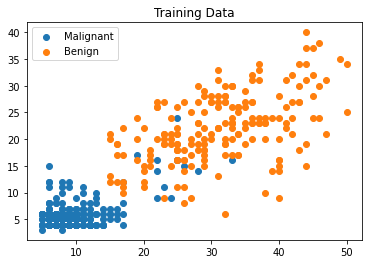

In [ ]:
C = X_train
#summing data
for i in range(X_train.shape[0]) :
  C[i][0]=X_train[i][0]+X_train[i][1]+X_train[i][2]+X_train[i][3]+X_train[i][4]
  C[i][1]=X_train[i][5]+X_train[i][6]+X_train[i][7]+X_train[i][8]

fig, ax = plt.subplots()
for label in [2, 4]:
    mask = (Y_train == label)
    ax.scatter(C[mask, 0], C[mask, 1])
L=['Malignant','Benign']
plt.title("Training Data")
ax.legend(L)
s=0
for j in range(Y_train.shape[0]) :
  if Y_train[j]==2 : s+=1

print('benign:',s, s/Y_train.shape[0])
print('malignant',Y_train.shape[0]-s, 1-s/Y_train.shape[0])

##Determining the Neighbors
**In our KNN algorithm, we will need a function to calculate the distances between training data points and the data that we would like to classify.**

**We have chosen the euclidian distance as it is a widely used in machine learning applications.**

In [ ]:
def distance(instance1, instance2):
    """
    We will be using euclidien data for the classification
    """
    # just in case, if the instances are lists or tuples:
    instance1 = np.array(instance1) 
    instance2 = np.array(instance2)

    return np.linalg.norm(instance1 - instance2)

**Neighbors are the k closest instances for a new test data in the training dataset.** 

**To locate the neighbors for a new test data, we must first calculate the distance between each training data to the new test data. We can do this using the distance function prepared above.**

**Once distances are calculated, we must sort all of the records in the training dataset by their distance to the new data.** 

**We can then select the top k to return as the most similar neighbors.**

In [ ]:
def get_neighbors(x_train, y_train, x_test, k, distance=distance):

    #get_neighors calculates a list of the k nearest neighbors of an instance 'x_test'.
    #The list neighbors contains 3-tuples with  (index, dist, label)
    #index    is the index from the x_train, 
    #dist     is the distance between the test_instance and the x_train[index]
    #distance is a reference to a function used to calculate the distances

    distances = []
    for index in range(len(x_train)):
        dist = distance(x_test, x_train[index])
        distances.append((x_train[index], dist, y_train[index]))
    distances.sort(key=lambda x: x[1])
    neighbors = distances[:k]
    return neighbors

##Data prediction
**After finding the k-nearest neighbors, we will try to predict the classes that our test data points belong to.**

**Here, we will implement** *prediction* **function to have k neighbors to the**  *x_test* **. The most similar neighbors collected from the training dataset can be used to make predictions.**

In [ ]:
# Classification in case of two classes
def prediction(x_train,y_train,x_test,k,labels,distance=distance):
  neighbors = get_neighbors(x_train,y_train,x_test,k,distance)
  sum_class_1 = 0
  for index in range(k):
    if neighbors[index][2] == labels[0] :
      sum_class_1 += 1
  if sum_class_1 >= (k//2) +1:
    y_test = labels[0]
  else :
    y_test = labels[1]
  return y_test


##Prediction data with our test data
**We will predict all of our test data by calculating the 5 first neighbors and store our result in** *Y_predict* **set.**

In [ ]:
k = 4
Y_predict = np.zeros(Y_test.shape)
for i in range(len(X_test)):
  Y_predict[i] = prediction(X_train,Y_train,X_test[i],k,[2,4],distance=distance)

### Calculating the MSE
The Mean Squared Error of a predicted data measures the average squared difference between the estimated values and true value.

In [ ]:
summation = 0  #variable to store the summation of differences
n = len(Y_test) #finding total number of items in list
for i in range (0,n):  #looping through each element of the list
  difference = Y_test[i] - Y_predict[i]  #finding the difference between observed and predicted value
  squared_difference = difference**2  #taking square of the differene 
  summation = summation + squared_difference  #taking a sum of all the differences
MSE = summation/n  #dividing summation by total values to obtain average
print("The Mean Square Error is: " , MSE)

The Mean Square Error is:  0.11428571428571428


In [ ]:
# Validating the classification function with the function KNeighborsClassifier available in the package sklearn 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 4)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
MSE = mean_squared_error(Y_test,Y_pred)
print('KNeighborsClassifier FUNCTION\n')
print('MSE = ', MSE)

KNeighborsClassifier FUNCTION

MSE =  0.17142857142857143


### Calculating the accuracy

In [ ]:
# calculating the accuracy 
def accuracy(y_test,y_predict):
  """
  This function calculates the accuracy of a predictor
  """
  sum = 0
  for index in range(len(y_test)):
    if y_test[index] == y_predict[index]:
      sum += 1
  accuracy = sum/len(y_test)
  return accuracy

print('LOCAL CLASSIFICATION FUNCTION\n')
print('ACCURACY = ', accuracy(Y_test,Y_predict))

LOCAL CLASSIFICATION FUNCTION

ACCURACY =  0.7071428571428572


In [ ]:
# Verification with the functions available in the package sklearn
from sklearn.metrics import confusion_matrix, accuracy_score
result1 = accuracy_score(Y_test,Y_predict)
print('KNeighborsClassifier FUNCTION\n')
print('ACCURACY = ', result1)

KNeighborsClassifier FUNCTION

ACCURACY =  0.7071428571428572


### Calculating the confusion matrix

In [ ]:
def confusion_matrix_local(y_test,y_predict,labels):
  sum_1 = 0   # real class 1, preditct class 1
  sum_2 = 0   # real class 2, predict class 1
  sum_3 = 0   # real class 1, predict class 2
  sum_4 = 0   # real class 2, predict class 2
  for index in range(len(y_test)):
    if y_test[index] == labels[0] :
      if y_predict[index] == labels[0] :
        sum_1 += 1
      else :
        sum_3 += 1
    else :
      if y_predict[index] == labels[1] :
        sum_4 += 1
      else :
        sum_2 += 1
  confusion_matrix = np.array([[sum_1,sum_3],
                            [sum_2,sum_4]])
  return confusion_matrix
print('LOCAL CLASSIFICATION FUNCTION\n')
print('CONFUSION_MATRIX = \n', confusion_matrix_local(Y_test,Y_predict,[2,4]))

LOCAL CLASSIFICATION FUNCTION

CONFUSION_MATRIX = 
 [[92  0]
 [41  7]]


In [ ]:
# verification with the functions available in the package sklearn
result = confusion_matrix(Y_test, Y_predict)
print('KNeighborsClassifier FUNCTION\n')
print('CONFUSION_FUNCTION = \n', result)

KNeighborsClassifier FUNCTION

CONFUSION_FUNCTION = 
 [[92  0]
 [41  7]]


### Choosing the best K with maximises the performances of the classification algorithm

In [ ]:
def K_choice(y_test,x_test,y_train,x_train):
  ACCURACY = []
  for k in range(2,10):
    y_predict = np.zeros(y_test.shape)
    for i in range(len(x_test)):
      y_predict[i] = prediction(x_train,y_train,x_test[i],k,[2,4],distance=distance)
    a = accuracy(y_test,y_predict)
    ACCURACY.append(a)
  # recherche du max de ACCURACY 
  max = 0
  k_max = 0
  for index in range(len(ACCURACY)):
    if ACCURACY[index] > max :
      max = ACCURACY[index]
      k_max = index + 2
  return [max,k_max]

best_choice = K_choice(Y_test,X_test,Y_train,X_train)
print('MAX = ',best_choice[0])
print('K_max = ',best_choice[1]) 

k = best_choice[1]
Y_predict_new = np.zeros(Y_test.shape)
for i in range(len(X_test)):
  Y_predict_new[i] = prediction(X_train,Y_train,X_test[i],k,[2,4],distance=distance)
print(Y_predict_new)


MAX =  0.9714285714285714
K_max =  4
[2. 4. 2. 2. 4. 4. 4. 2. 2. 2. 2. 4. 4. 4. 2. 4. 2. 4. 4. 4. 4. 2. 2. 4.
 2. 4. 4. 2. 2. 4. 4. 2. 4. 2. 2. 2. 4. 2. 4. 2. 2. 2. 2. 2. 2. 2. 4. 2.
 2. 2. 2. 4. 2. 2. 4. 4. 4. 2. 2. 4. 2. 2. 4. 2. 2. 2. 2. 2. 4. 2. 2. 2.
 2. 2. 4. 2. 4. 2. 2. 4. 4. 2. 2. 4. 2. 2. 2. 2. 4. 2. 4. 4. 2. 2. 2. 2.
 2. 4. 2. 2. 2. 4. 4. 2. 4. 2. 4. 2. 2. 4. 2. 4. 2. 2. 4. 2. 2. 2. 2. 2.
 4. 4. 2. 2. 4. 2. 2. 2. 2. 2. 2. 2. 4. 4. 2. 2. 2. 4. 2. 2.]


### Visualisation of test and predicted data 

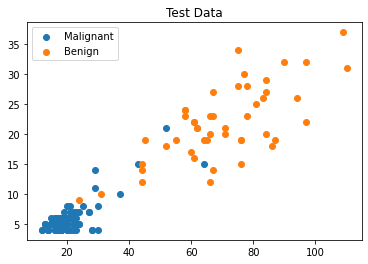

In [ ]:
C = X_test
#summing data
for i in range(X_test.shape[0]) :
  C[i][0]=X_test[i][0]+X_test[i][1]+X_test[i][2]+X_test[i][3]+X_test[i][4]
  C[i][1]=X_test[i][5]+X_test[i][6]+X_test[i][7]+X_test[i][8]

fig, ax = plt.subplots()
for label in [2, 4]:
    mask = (Y_test == label)
    ax.scatter(C[mask, 0], C[mask, 1])
L=['Malignant','Benign']
plt.title("Test Data")
ax.legend(L)

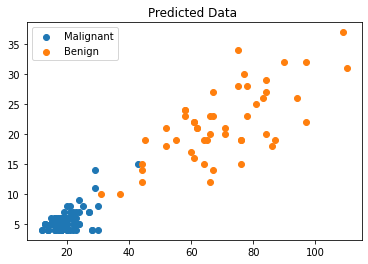

In [ ]:
fig, ax = plt.subplots()
for label in [2, 4]:
    mask = (Y_predict== label)
    ax.scatter(C[mask, 0], C[mask, 1])
L=['Malignant','Benign']
plt.title("Predicted Data ")
ax.legend(L)

## Working with the second dataset 
## Importing the data
**We need here to assign column names to the dataset as follows :**


In [ ]:
headernames2 = ["Age of patient at time of operation","Patient's year of operation","Number of positive axillary nodes detected","Survival status"]
USE_COLAB = True
UPLOAD_OUTPUTS = False
if USE_COLAB:
    # mount the goole drive
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    # download data on GoogleDrive
    data_dir = "/content/drive/My Drive/ROB311/"
else:
    data_dir = "data/"

Mounted at /content/drive


In [ ]:
data2 = 'haberman.csv'
dataset2 = pd.read_csv( os.path.join(data_dir, data2),names = headernames2 )
dataset2.head()

,Age of patient at time of operation,Patient's year of operation,Number of positive axillary nodes detected,Survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Data preprocessing
**Same as we have done with the fist data, we will divide the dataset into train and test split. Following code will split the dataset into 80% training data and 20% of testing data.**


In [ ]:
X2 = dataset2.iloc[:, [0,1,2]].values
Y2 = dataset2.iloc[:, 3].values

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.2)

## Visualizing data 
**The following code allows to visualize the data of our training set.**

**Our training data is composed of 3 values per each item, so we will reduce the data to thwo values by summing up the first 2 values so that they represent just one feature. This way, we are capable of depicting the data in 2-dimensional space as we have done with the first dataset:**

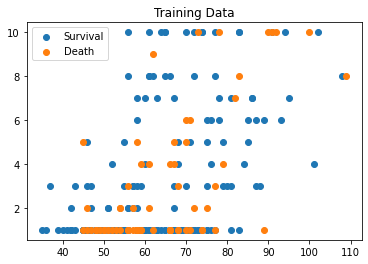

In [ ]:
C = X2_train
#summing data
for i in range(X2_train.shape[0]) :
  C[i][0]=X2_train[i][0]+X_train[i][1]
  C[i][1]=X_train[i][2]

fig, ax = plt.subplots()
for label in [1,2]:
    mask = (Y2_train == label)
    ax.scatter(C[mask, 0], C[mask, 1])
L=['Survival','Death']
plt.title("Training Data")
ax.legend(L)

##Data prediction

In [ ]:
k = 3
Y2_predict = np.zeros(Y2_test.shape)
for i in range(len(X2_test)):
  Y2_predict[i] = prediction(X2_train,Y2_train,X2_test[i],k,[1,2],distance=distance)

### Calculating the MSE

In [ ]:
from sklearn.metrics import mean_squared_error
# calculating the MSE of Y_predict
MSE = mean_squared_error(Y2_test,Y2_predict)
print('LOCAL CLASSIFICATION FUNCTION\n')
print('MSE = ', MSE)

LOCAL CLASSIFICATION FUNCTION

MSE =  0.22580645161290322


In [ ]:
# Validating the classification function with the function KNeighborsClassifier available in the package sklearn 
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X2_train, Y2_train)
Y2_pred = classifier.predict(X2_test)
MSE = mean_squared_error(Y2_test,Y2_pred)
print('KNeighborsClassifier FUNCTION\n')
print('MSE = ', MSE)

KNeighborsClassifier FUNCTION

MSE =  0.24193548387096775


### Calculating the accuracy

In [ ]:
print('LOCAL CLASSIFICATION FUNCTION\n')
print('ACCURACY = ', accuracy(Y2_test,Y2_predict))

LOCAL CLASSIFICATION FUNCTION

ACCURACY =  0.7580645161290323


In [ ]:
# Verification with the functions available in the package sklearn
from sklearn.metrics import confusion_matrix, accuracy_score
result1 = accuracy_score(Y2_test,Y2_predict)
print('KNeighborsClassifier FUNCTION\n')
print('ACCURACY = ', result1)

KNeighborsClassifier FUNCTION

ACCURACY =  0.7580645161290323


### Calculating the confusion matrix

In [ ]:
print('LOCAL CLASSIFICATION FUNCTION\n')
print('CONFUSION_MATRIX = \n', confusion_matrix_local(Y2_test,Y2_predict,[1,2]))

LOCAL CLASSIFICATION FUNCTION

CONFUSION_MATRIX = 
 [[44  4]
 [11  3]]


In [ ]:
# verification with the functions available in the package sklearn
result = confusion_matrix(Y2_test, Y2_predict)
print('KNeighborsClassifier FUNCTION\n')
print('CONFUSION_FUNCTION = \n', result)

KNeighborsClassifier FUNCTION

CONFUSION_FUNCTION = 
 [[44  4]
 [11  3]]


### Choosing the best K with maximises the performances of the classification algorithm

In [ ]:
best_choice2 = K_choice(Y2_test,X2_test,Y2_train,X2_train)
print('MAX = ',best_choice2[0])
print('K_max = ',best_choice2[1]) 

MAX =  0.04838709677419355
K_max =  3


### Visualisation of test and predicted data 

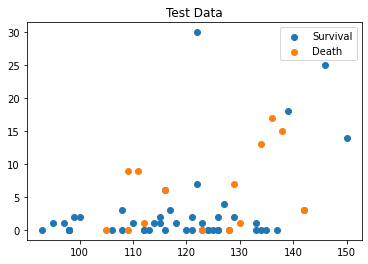

In [ ]:
C = X2_test
#summing data
for i in range(X2_test.shape[0]) :
  C[i][0]=X2_test[i][0]+X2_test[i][1]
  C[i][1]=X2_test[i][2]

fig, ax = plt.subplots()
for label in [1, 2]:
    mask = (Y2_test == label)
    ax.scatter(C[mask, 0], C[mask, 1])
L=['Survival','Death']
plt.title("Test Data")
ax.legend(L)

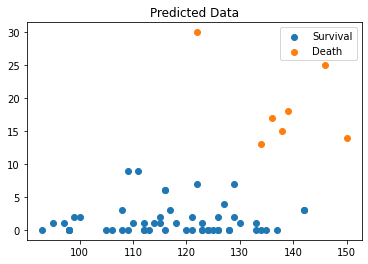

In [ ]:
fig, ax = plt.subplots()
for label in [1, 2]:
    mask = (Y2_predict == label)
    ax.scatter(C[mask, 0], C[mask, 1])
L=['Survival','Death']
plt.title("Predicted Data")
ax.legend(L)

In [ ]:
# calcul de la matrice de confusion 
sum_1 = 0   # classe réelle 1, prédit classe 1
sum_2 = 0   # classe réelle 2, prédit classe 1
sum_3 = 0   # classe réelle 1, prédit classe 2
sum_4 = 0   # classe réelle 2, prédit classe 2
for index in range(len(Y2_test)):
  if Y2_test[index] == 1 :
    if Y2_predict[index] == 1 :
      sum_1 += 1
    else :
      sum_3 += 1
  else :
    if Y2_predict[index] == 2 :
      sum_4 += 1
    else :
      sum_2 += 1
confusion_matrix = np.array([[sum_1,sum_3],
                            [sum_2,sum_4]])
confusion_matrix

array([[48,  0],
       [14,  0]])

In [ ]:
# vérification avec la fonction prédéfinie 
from sklearn.metrics import confusion_matrix, accuracy_score
result = confusion_matrix(Y2_test, Y2_predict)
result

array([[48,  0],
       [14,  0]])